# FF Convergence

In [1]:
import sys
sys.path.insert(0, '../../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import tensorflow as tf
import random
import pickle as pkl

from qiskit.quantum_info import Operator, Statevector, random_unitary
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from quantum_tools import circuit_to_matrix, partial_trace
from kraus_channels import isomery_to_kraus, KrausMap
from quantum_channel import ConcatChannel, DilutedChannel, IdentityChannel, ChoiMapStatic
from utils import numberToBase, kron, loader
from spectrum import complex_spacing_ratio, channel_spectrum, Spectrum, mean_spacing, coat_spectrum
from analysis import spectrum_to_angular, spectrum_to_radial, hist_ensamble
from qiskit.circuit.library import iSwapGate, XGate, YGate, HGate, CXGate, RGate, RZGate
from quantum_circuits import integrable_circuit, nonintegrable_circuit, haar_random
from synthetic_data import generate_map_data
from optimization import ModelQuantumMap, Logger, model_saver
from loss_functions import ProbabilityMSE, ProbabilityRValue, channel_fidelity_loss

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=1)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


## Noisy More Samples

### FF

In [5]:
model_list = loader("models/model_list_FF_noisy_DU.model")

[channel_list, spectra_list, csr_list] = loader("data/FF_DU_synthetic_benchmark.pkl")

print(len(model_list))
spectrum_exp_list = [channel_spectrum(model.channel) for model in model_list]
csr_exp_list = [complex_spacing_ratio(spectrum) for spectrum in spectrum_exp_list]


10


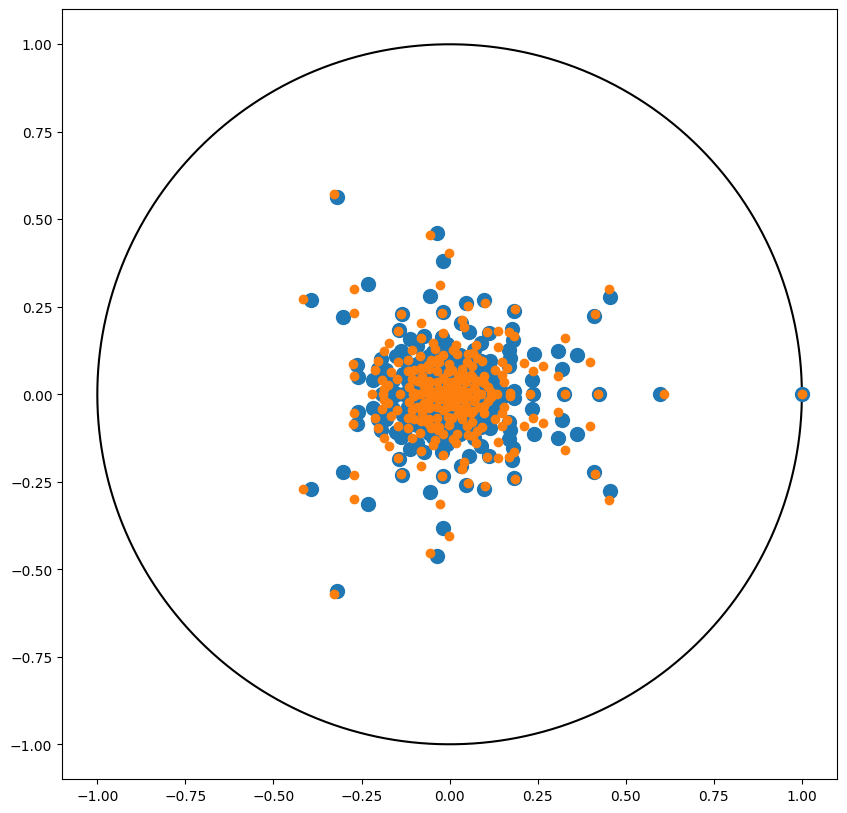

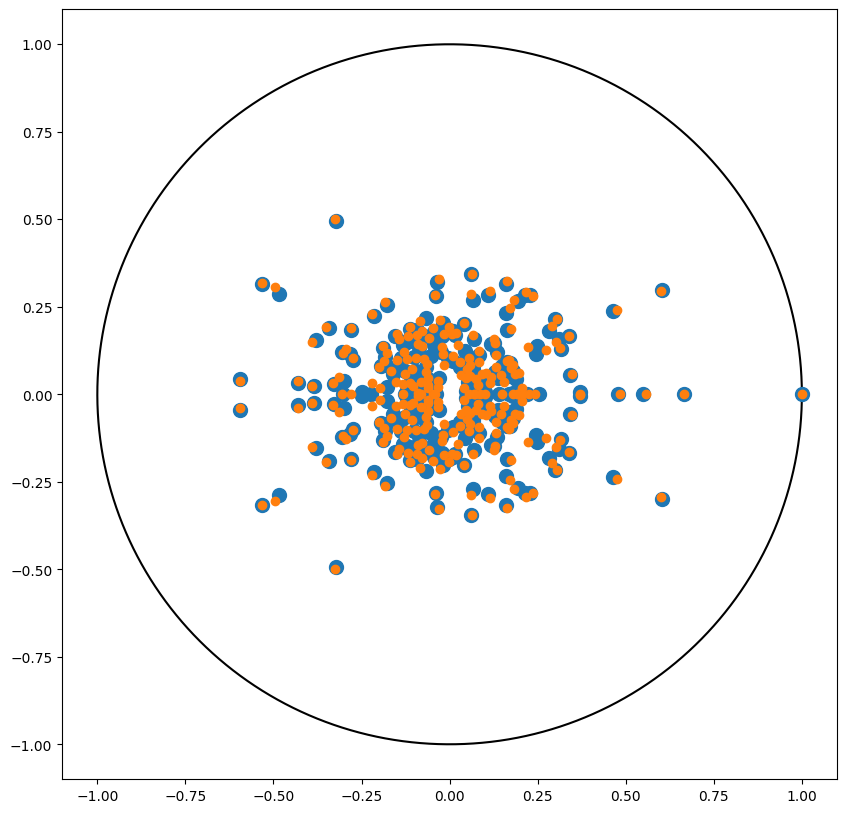

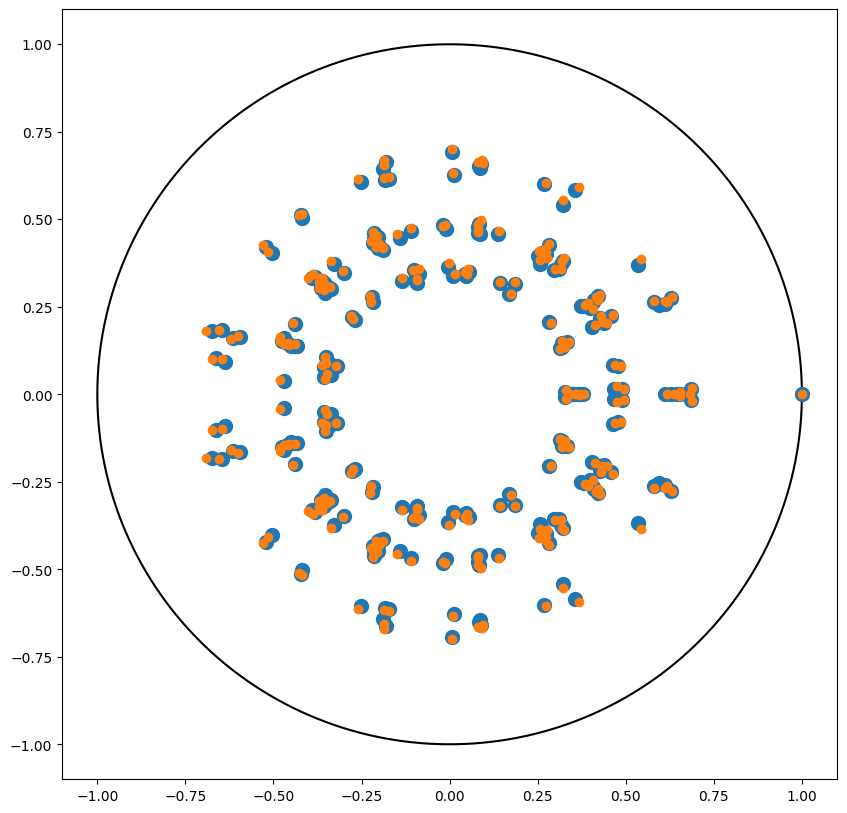

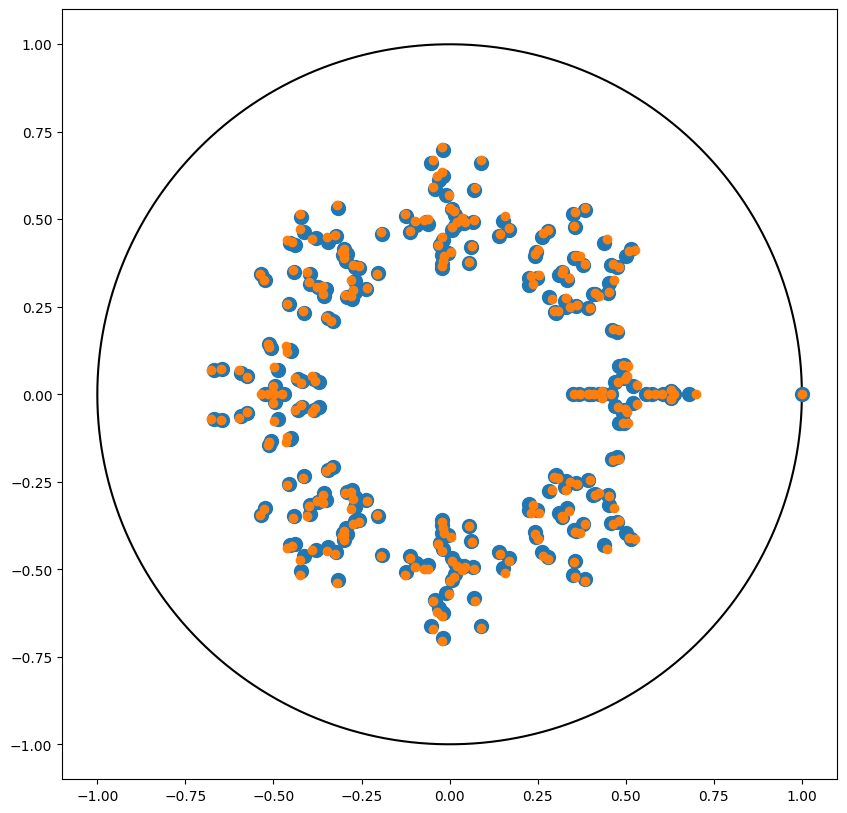

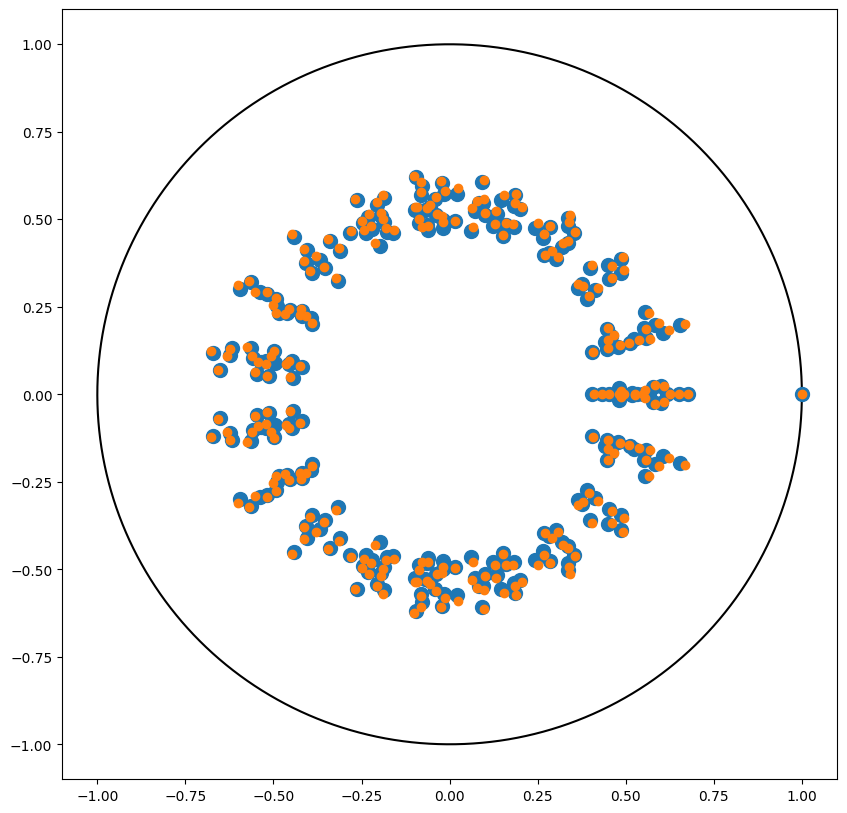

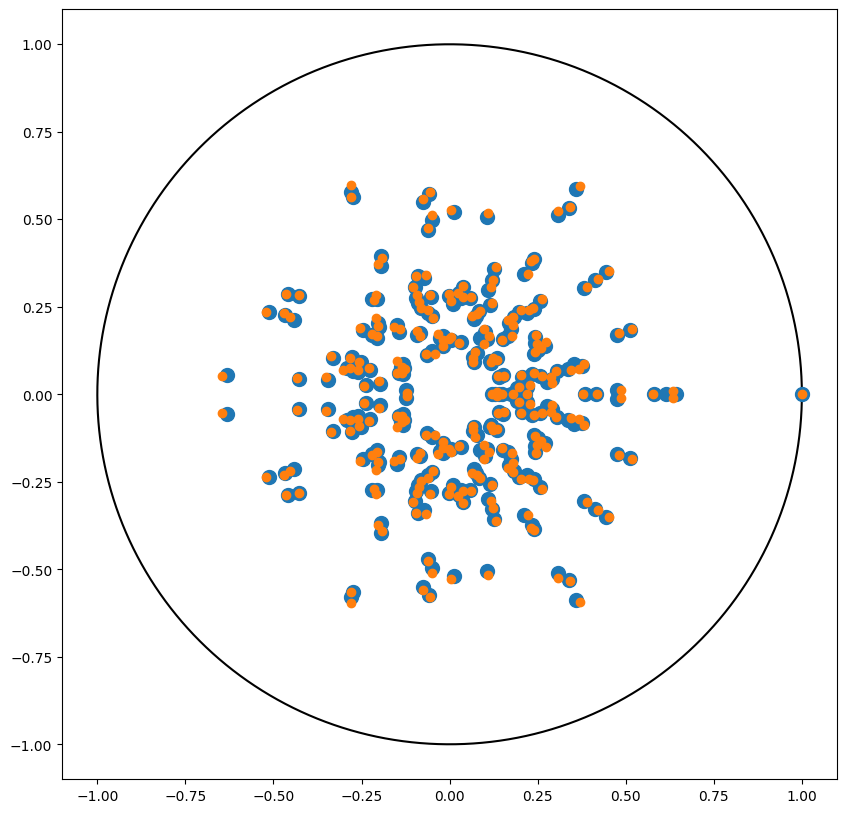

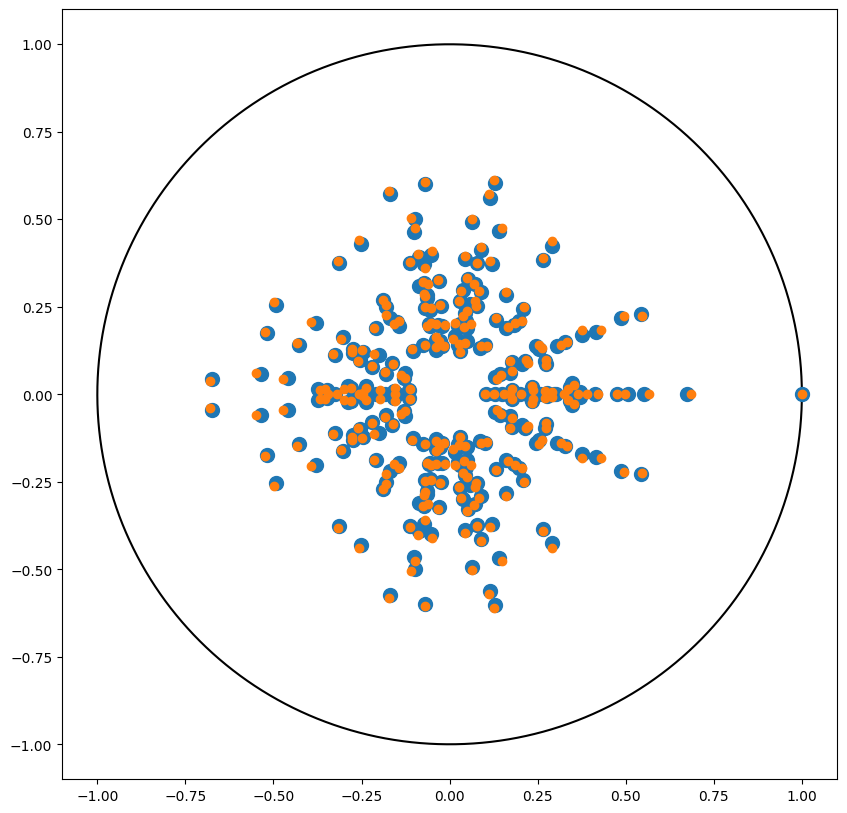

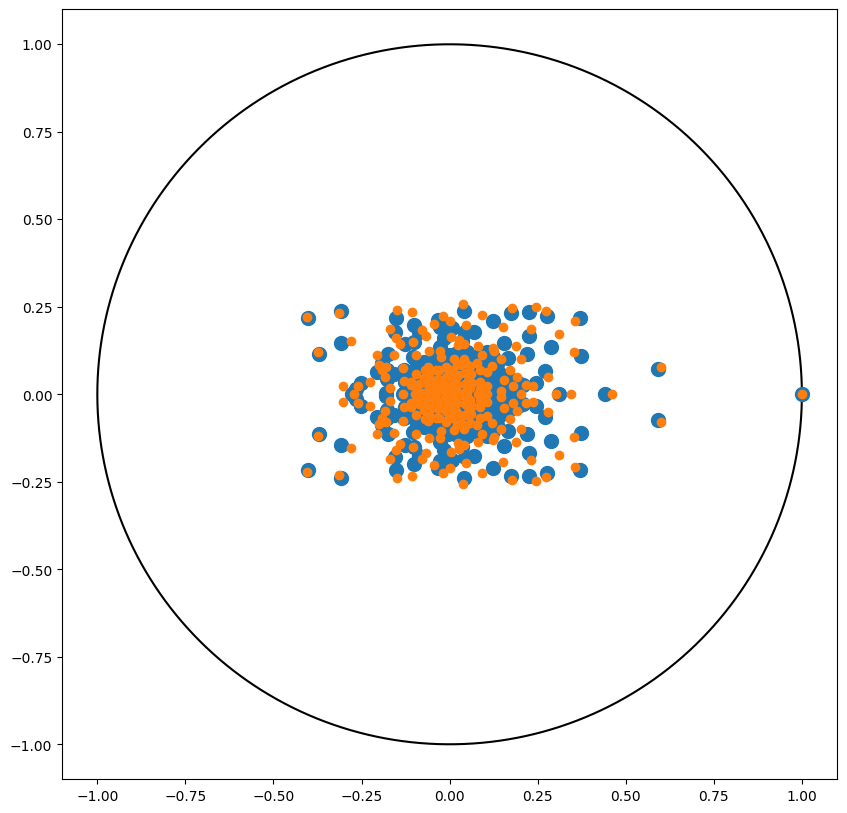

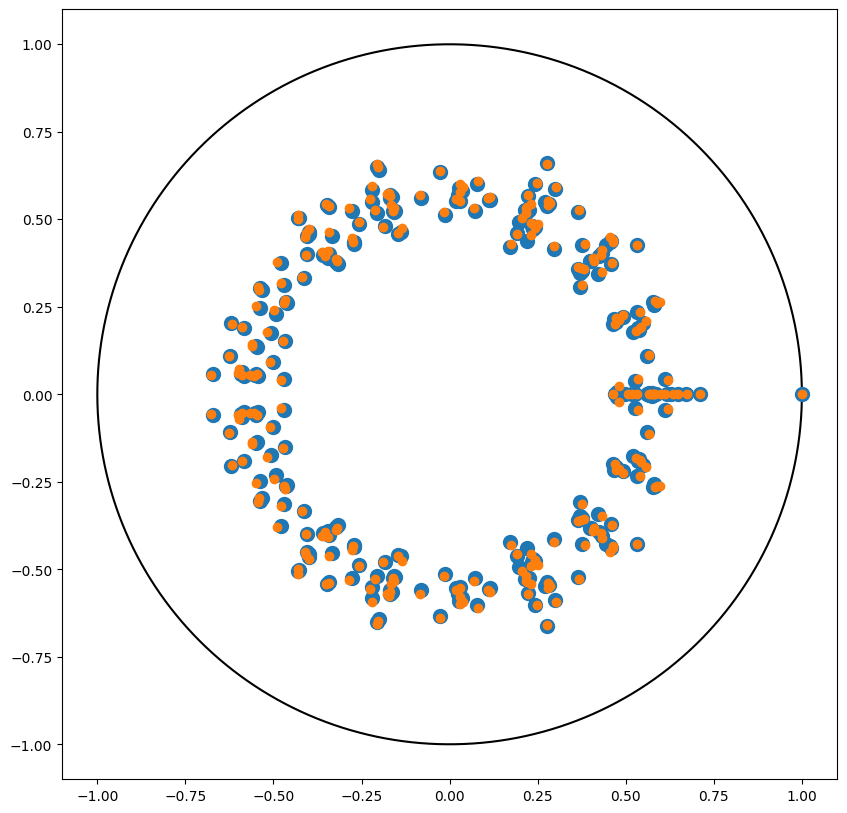

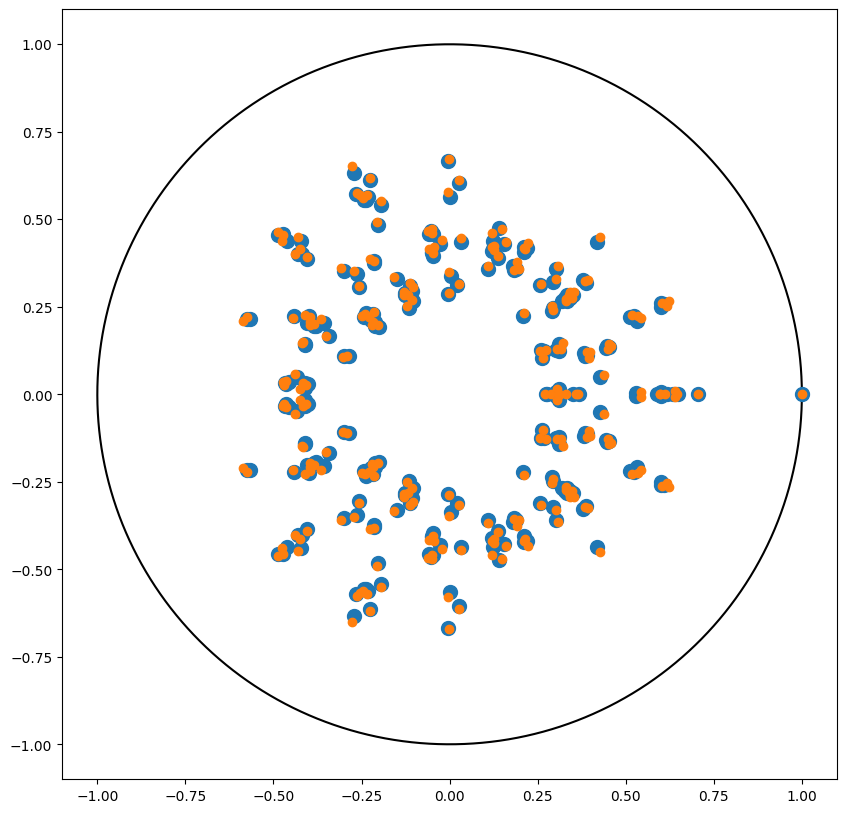

In [6]:
for spectrum_exp, spectrum in zip(spectrum_exp_list, spectra_list):
    spectrum_exp.plot_circle()
    spectrum_exp.plot(markersize=10)
    spectrum.plot(markersize=6)
    plt.show()

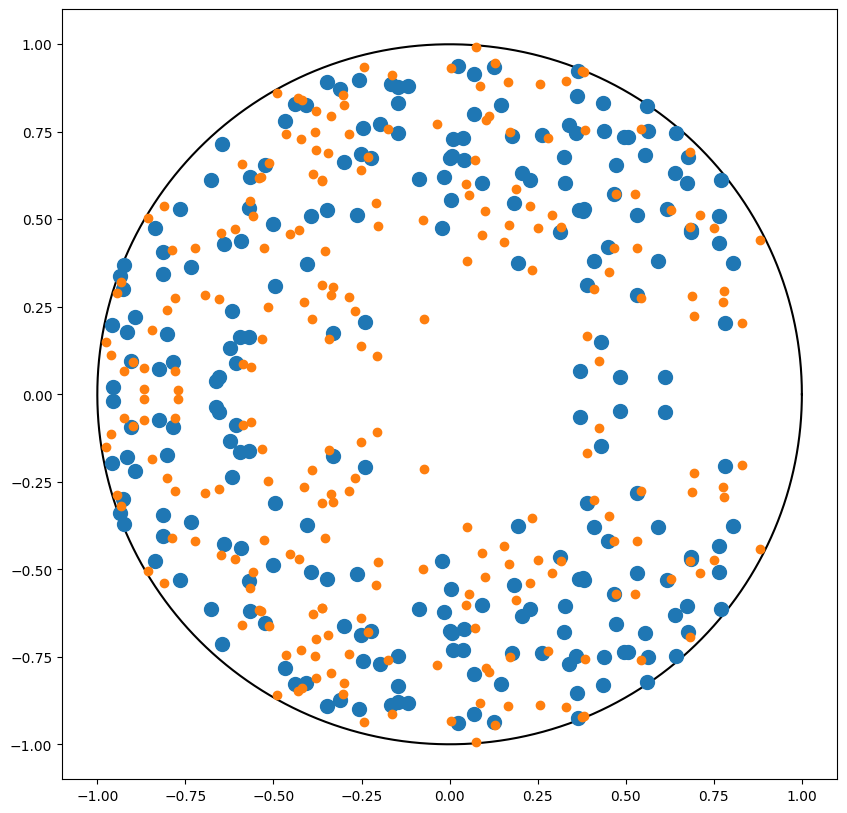

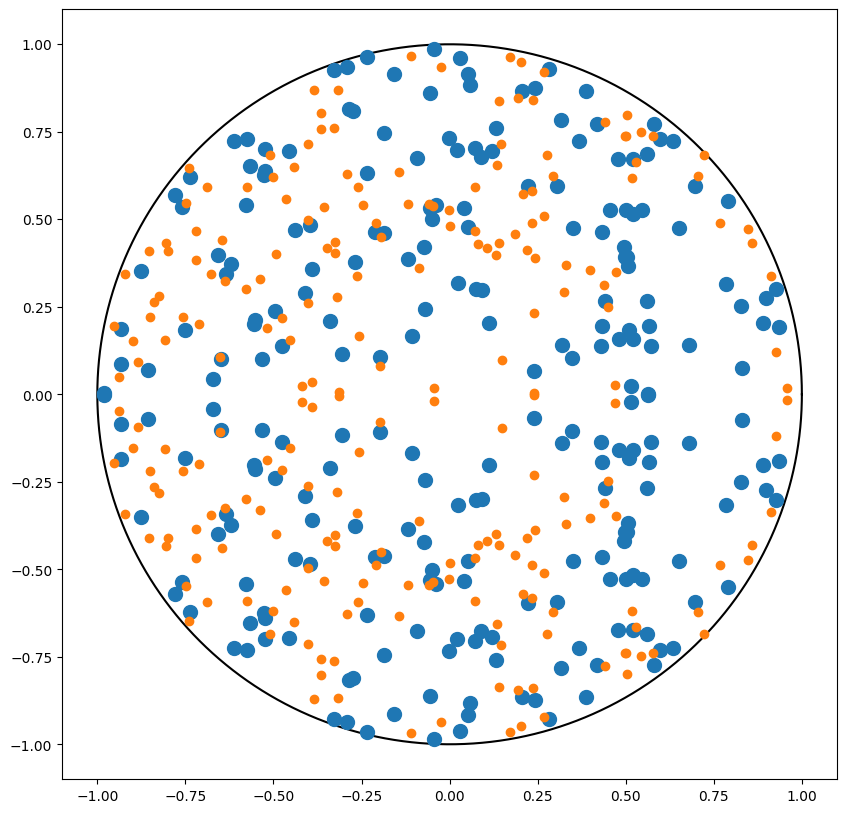

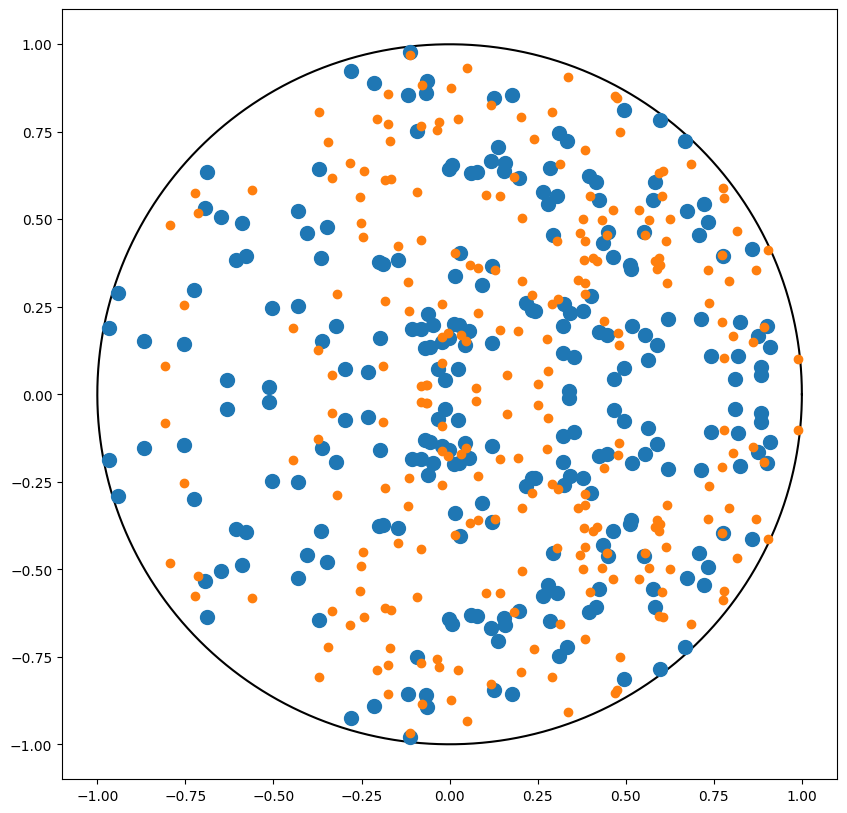

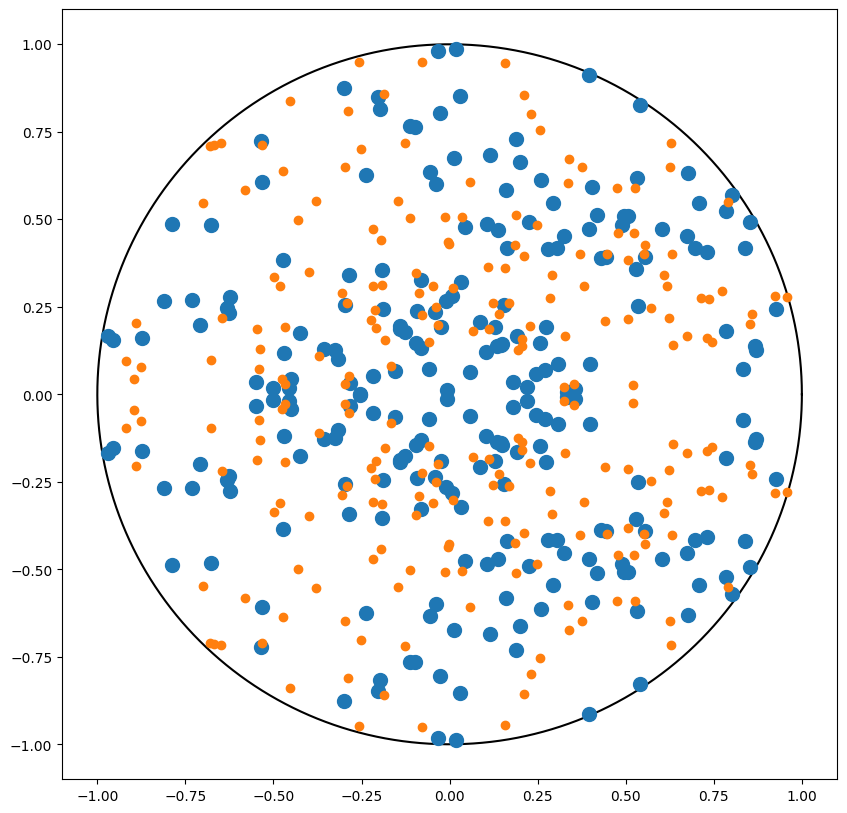

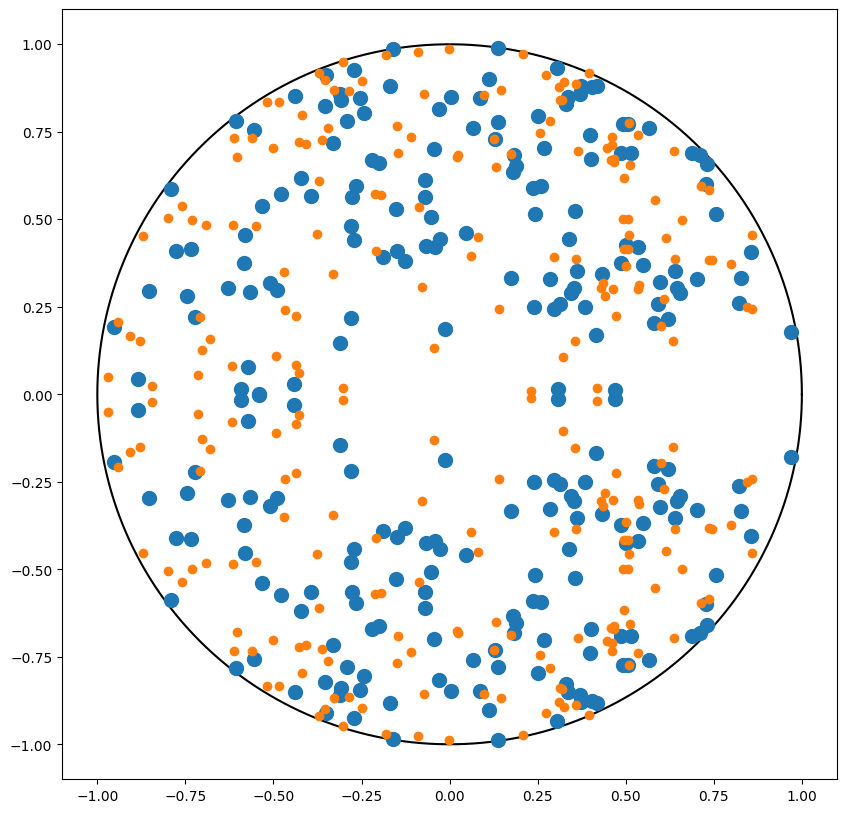

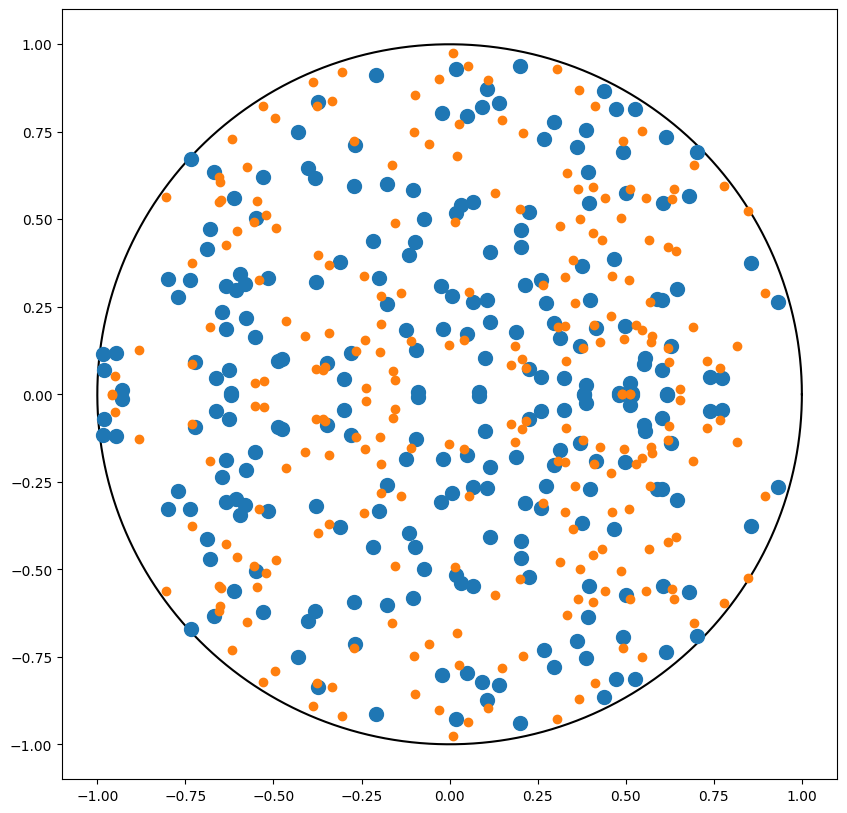

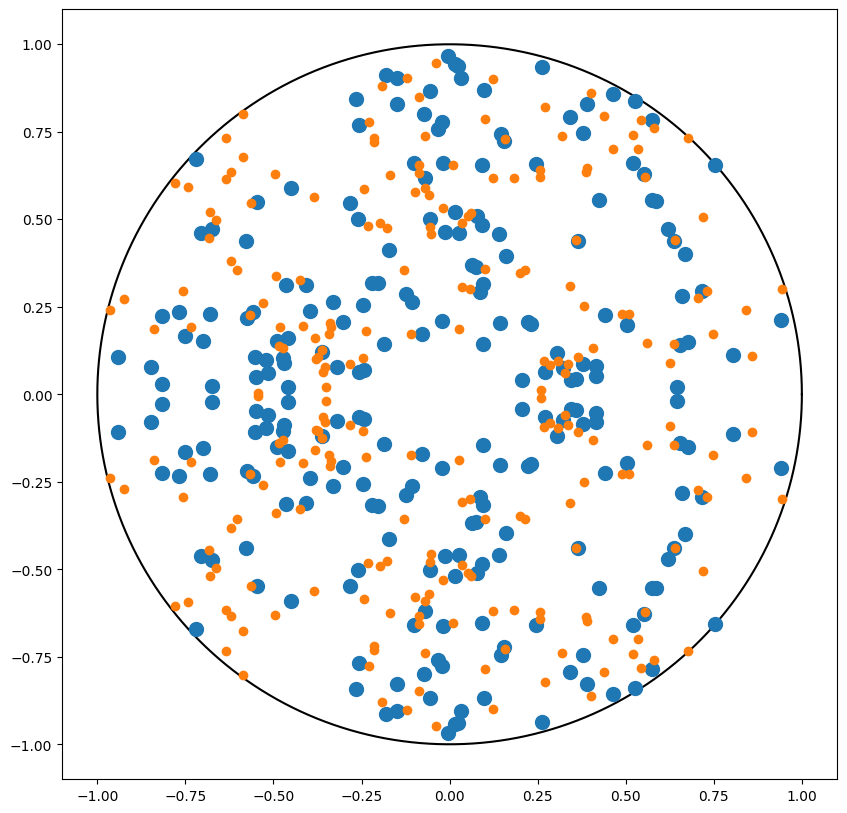

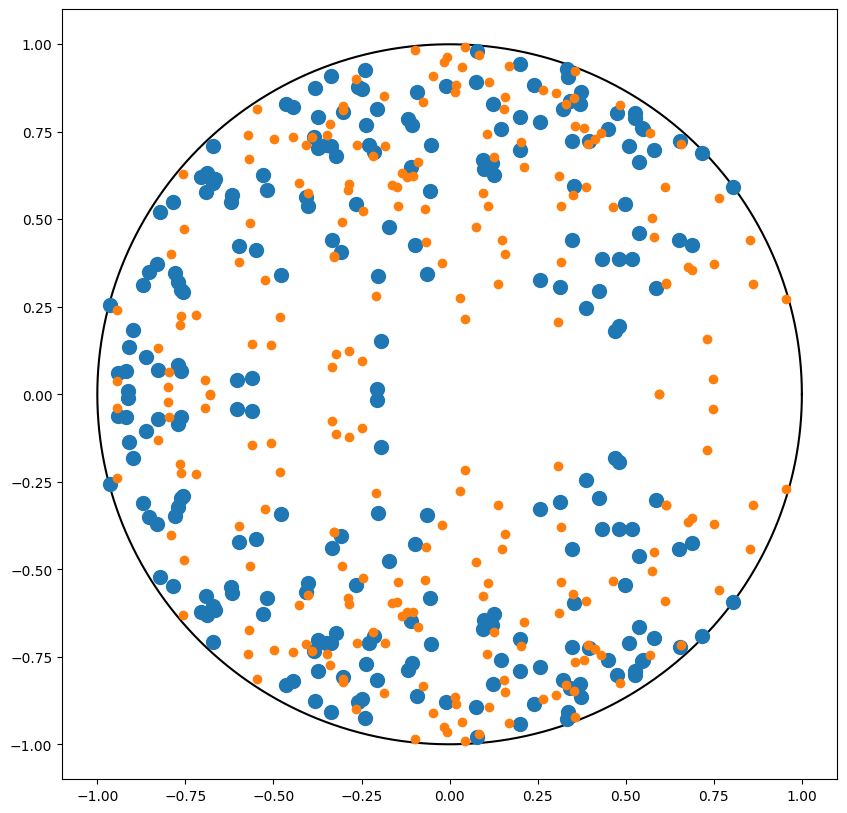

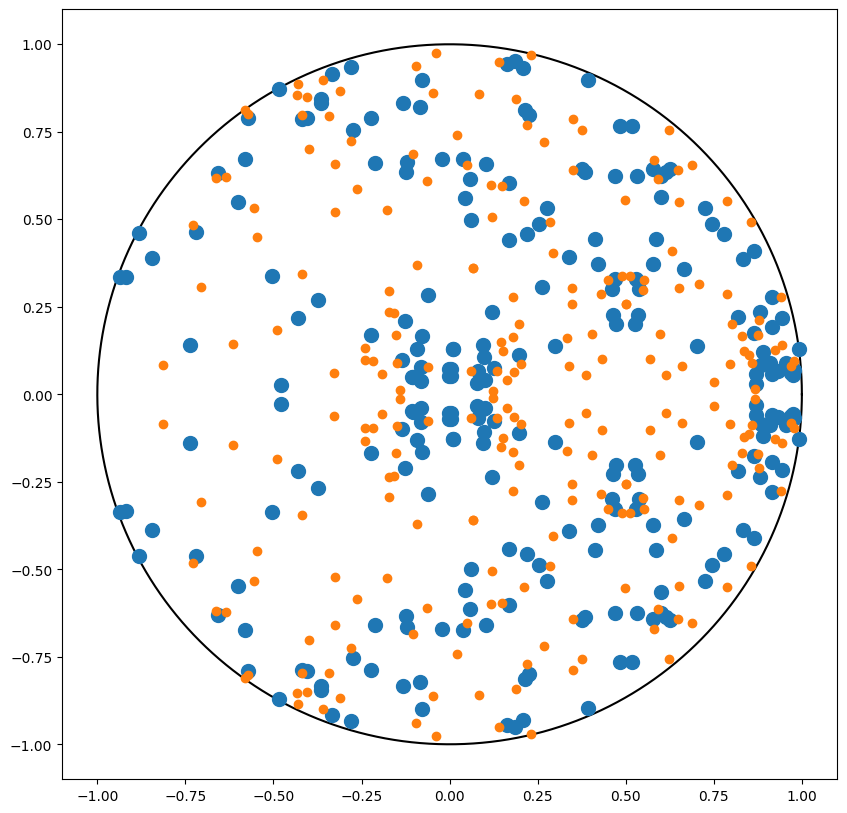

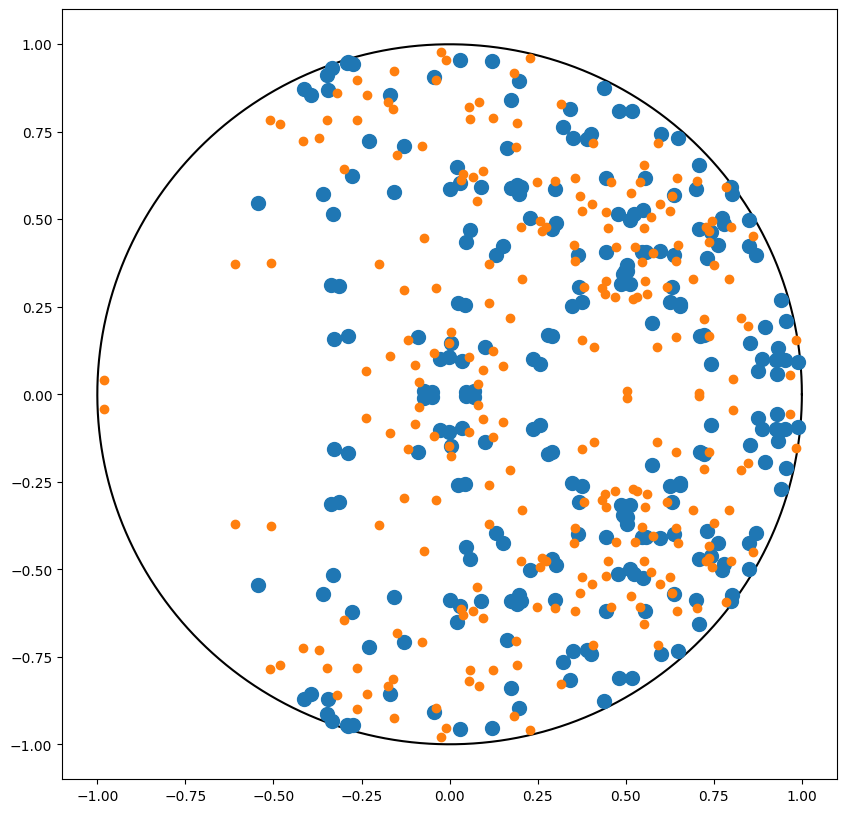

In [7]:
for csr_exp, csr in zip(csr_exp_list, csr_list):
    csr_exp.plot_circle()
    csr_exp.plot(markersize=10)
    csr.plot(markersize=6)
    plt.show()

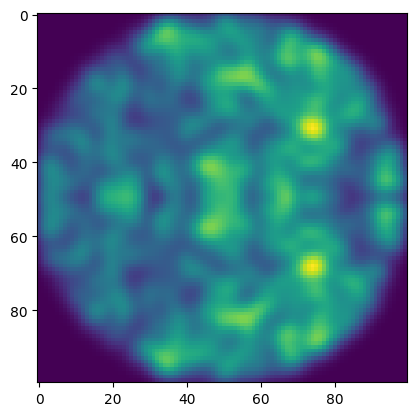

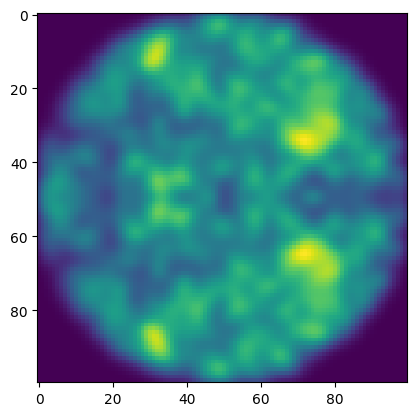

In [8]:
csr_exp_coat = coat_spectrum(Spectrum(csr_exp_list), sigma=0.05)
csr_coat = coat_spectrum(Spectrum(csr_list), sigma=0.05)

plt.imshow(csr_exp_coat)
plt.show()

plt.imshow(csr_coat)
plt.show()

## Chaotic Maps

In [11]:
model_list = loader("models/model_list_chaotic_noisy_moreSamples.model")

[channel_list, spectra_list, csr_list] = loader("data/chaotic_synthetic_benchmark.pkl")

print(len(model_list))
spectrum_exp_list = [channel_spectrum(model.channel) for model in model_list]
csr_exp_list = [complex_spacing_ratio(spectrum) for spectrum in spectrum_exp_list]

10


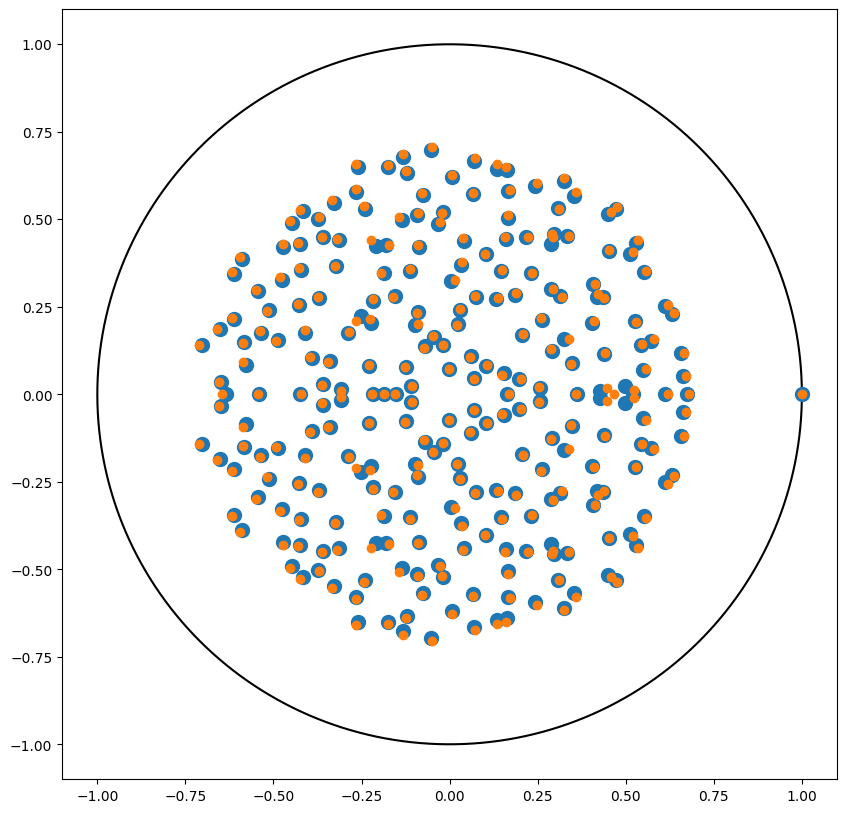

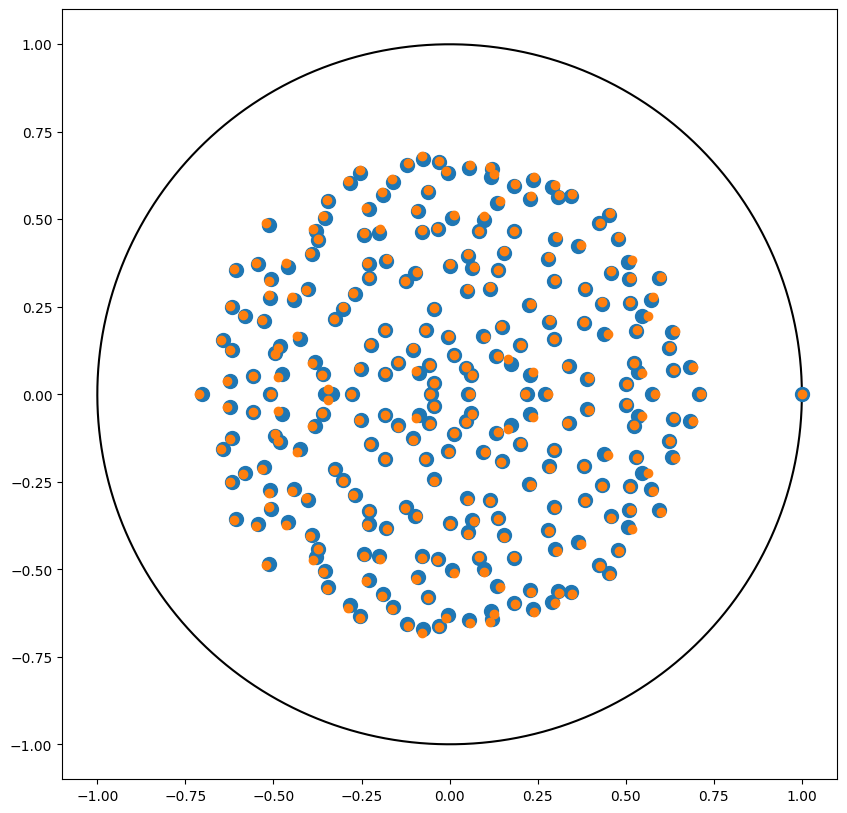

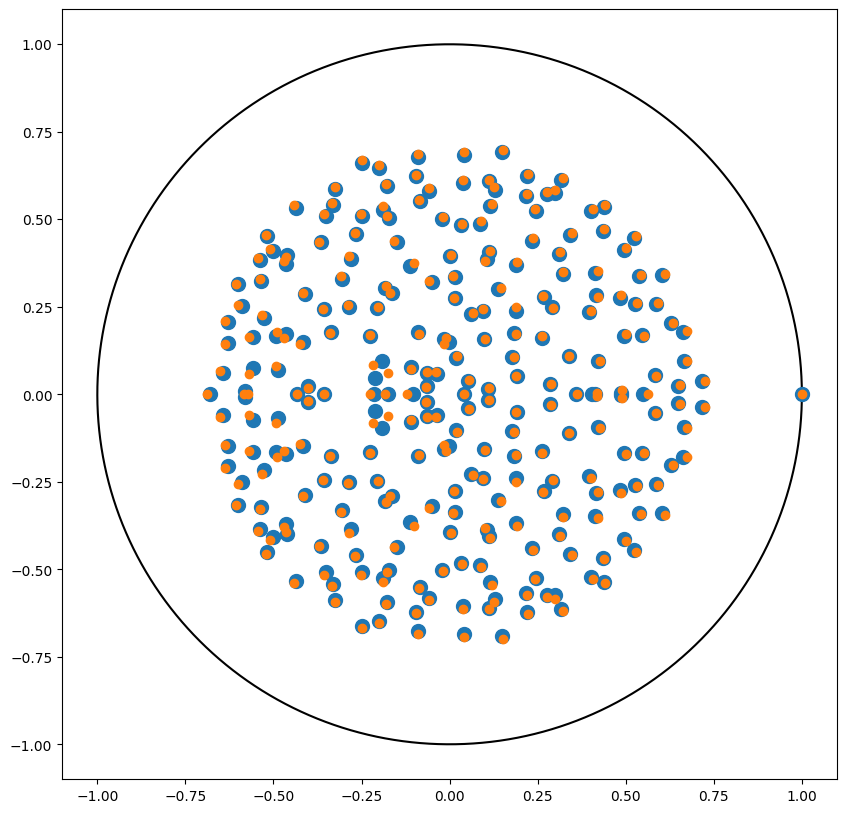

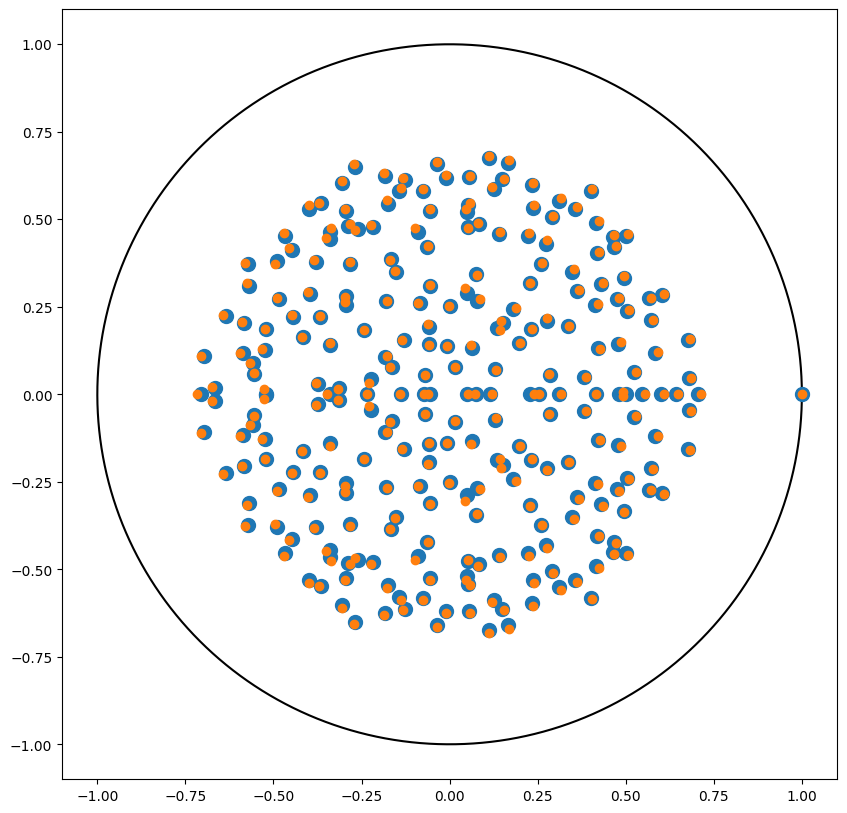

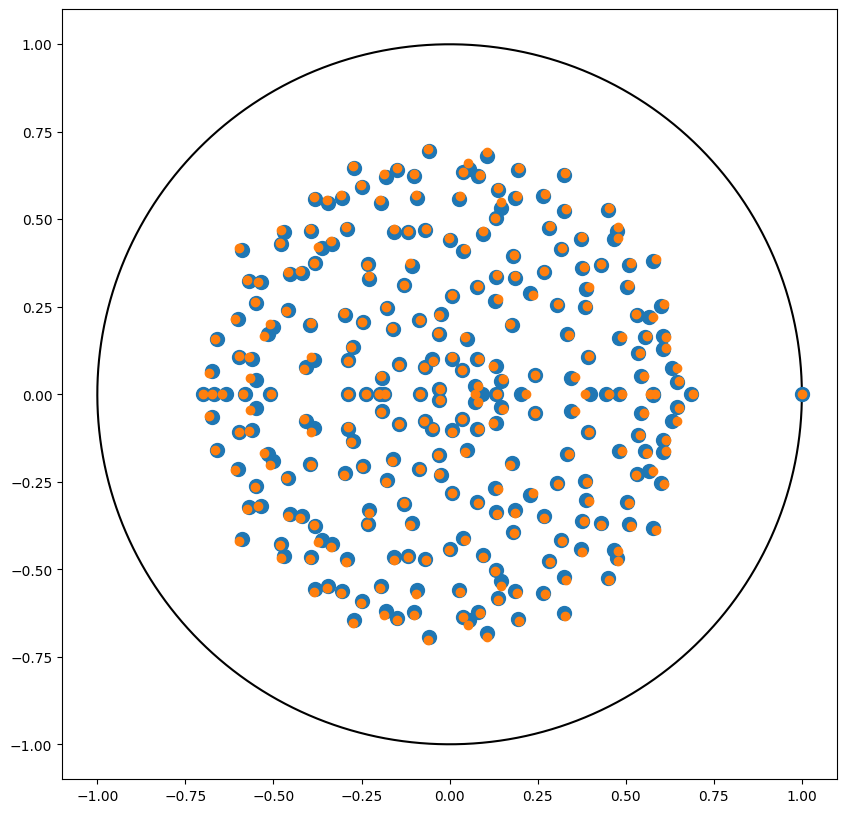

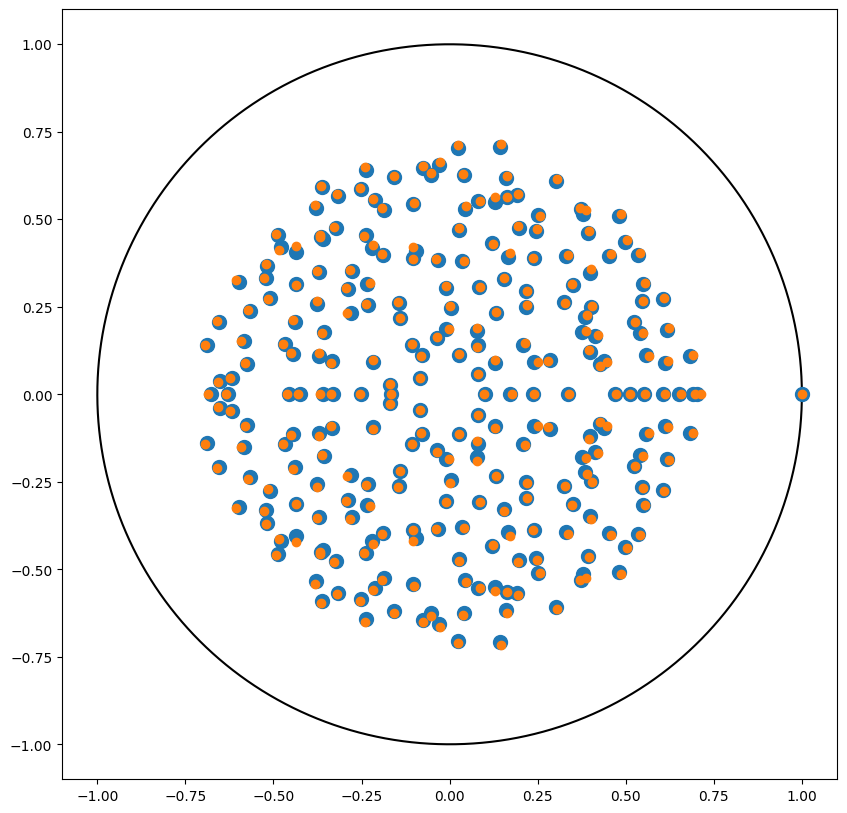

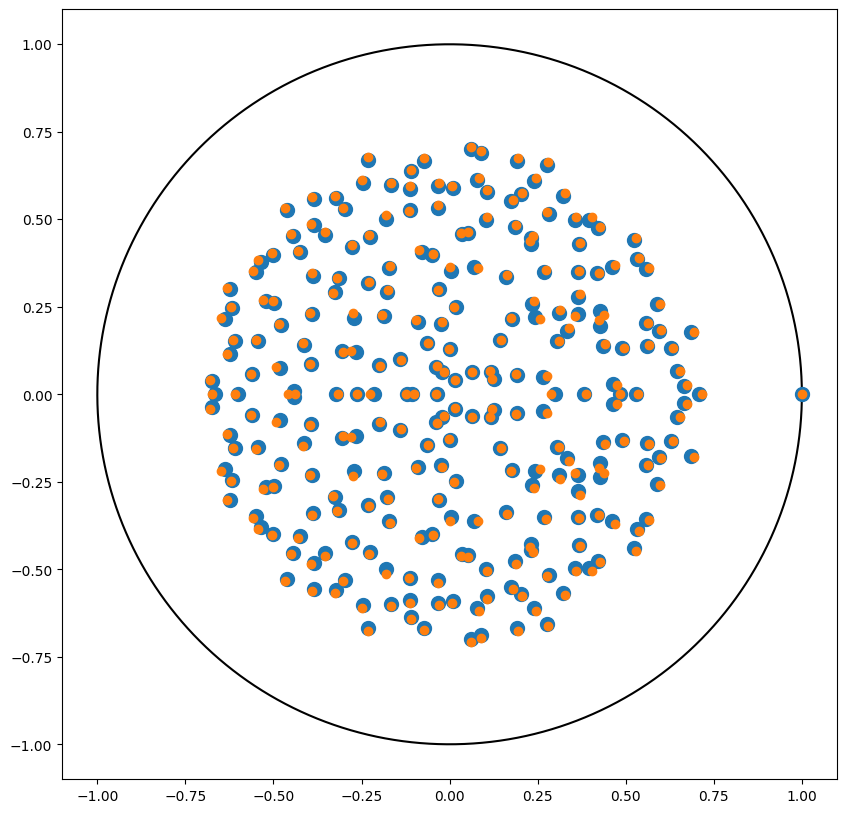

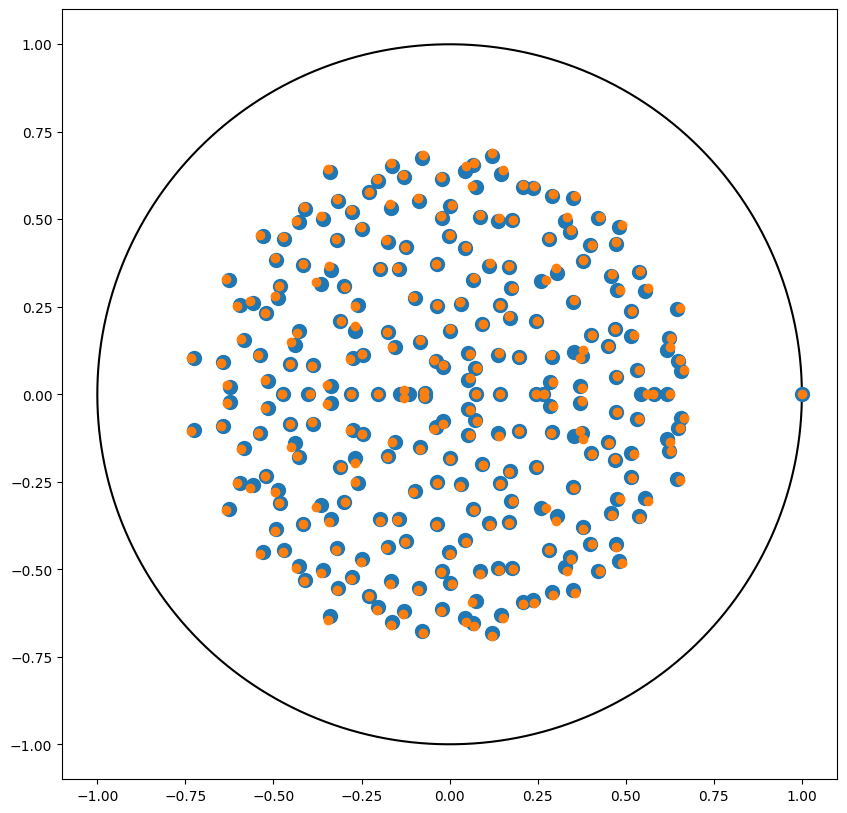

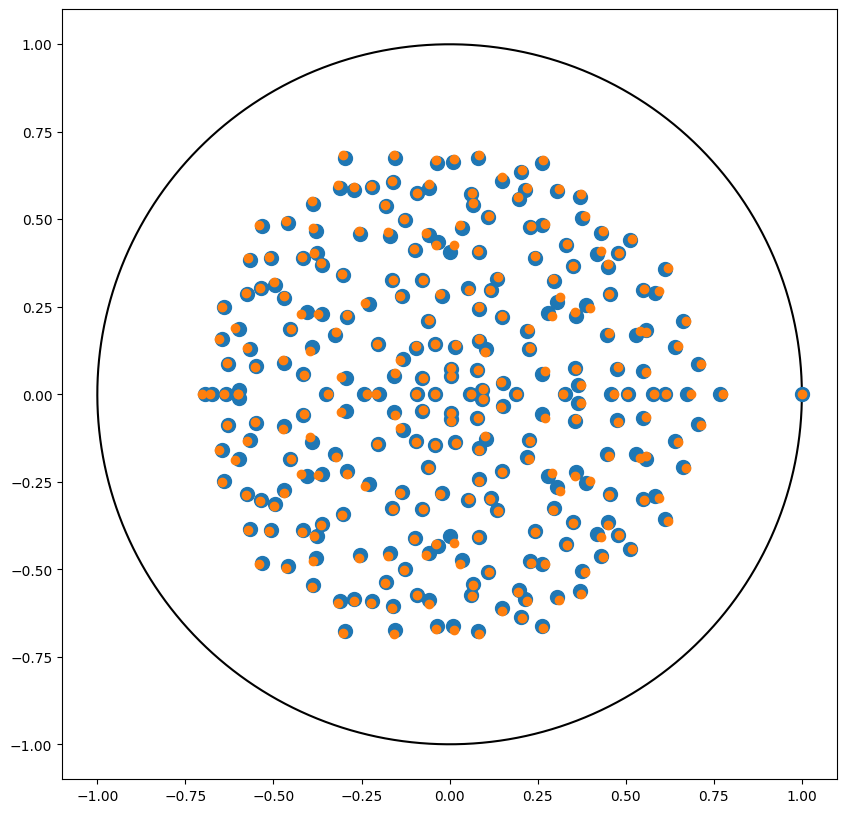

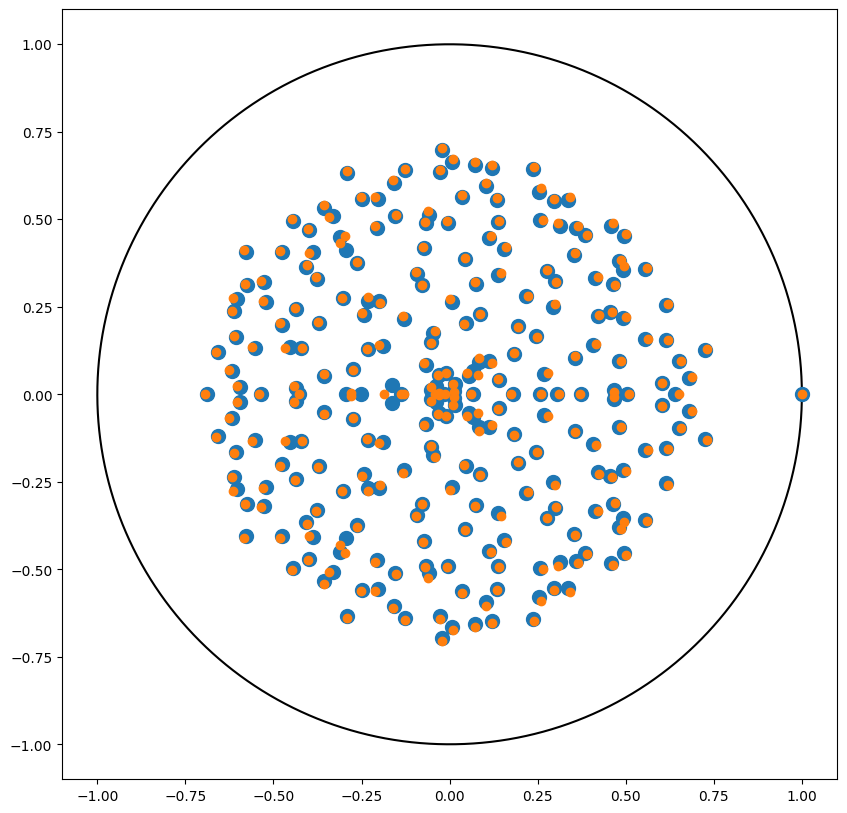

In [12]:
for spectrum_exp, spectrum in zip(spectrum_exp_list, spectra_list):
    spectrum_exp.plot_circle()
    spectrum_exp.plot(markersize=10)
    spectrum.plot(markersize=6)
    plt.show()

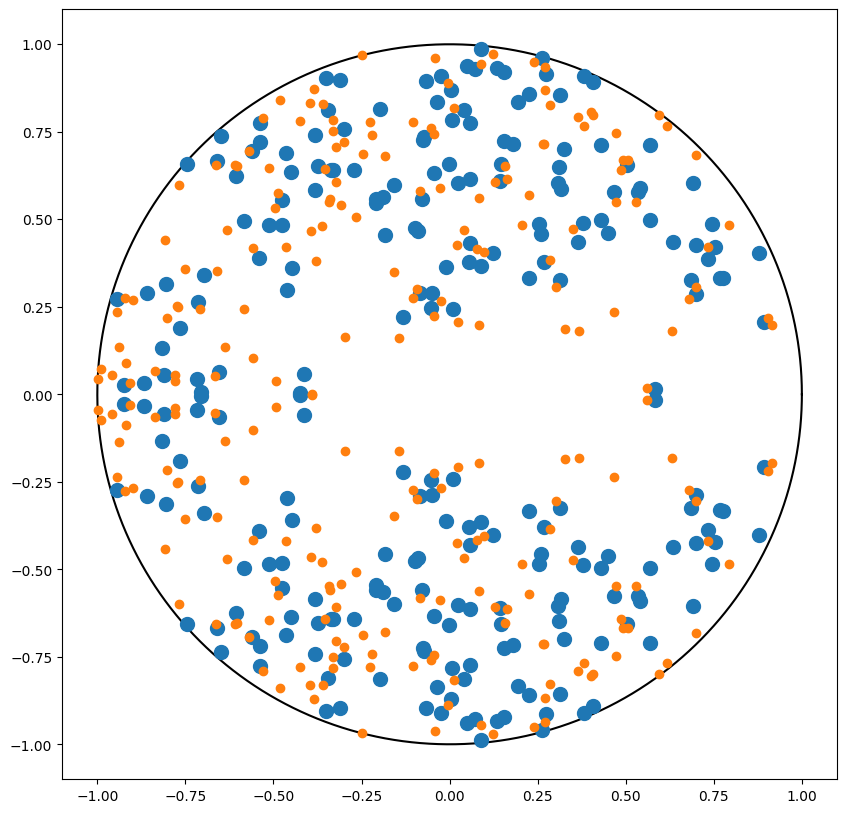

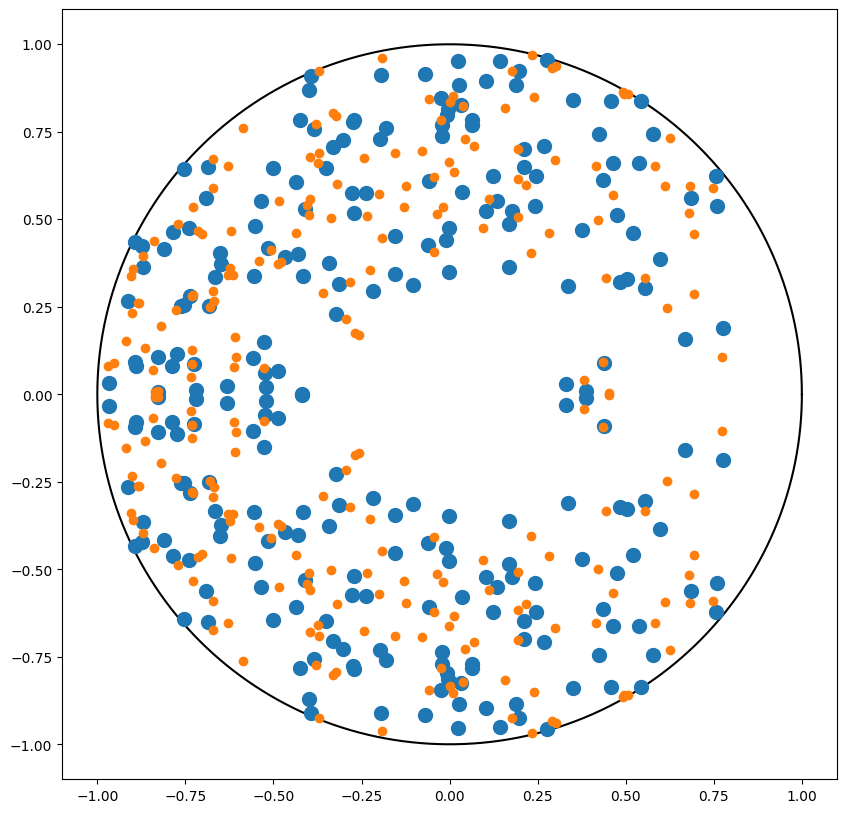

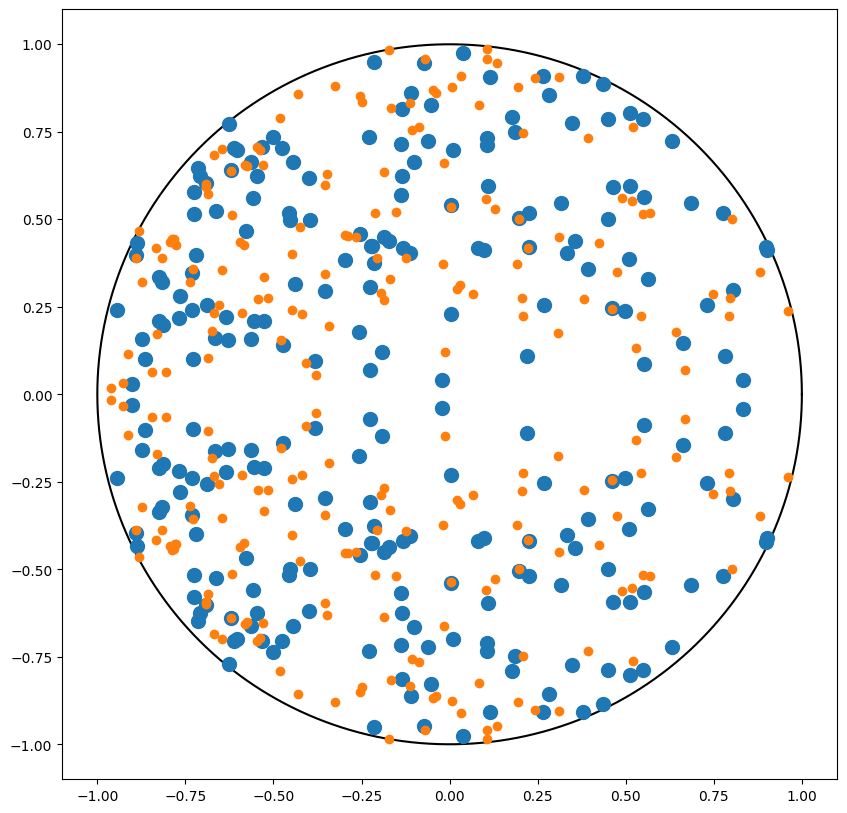

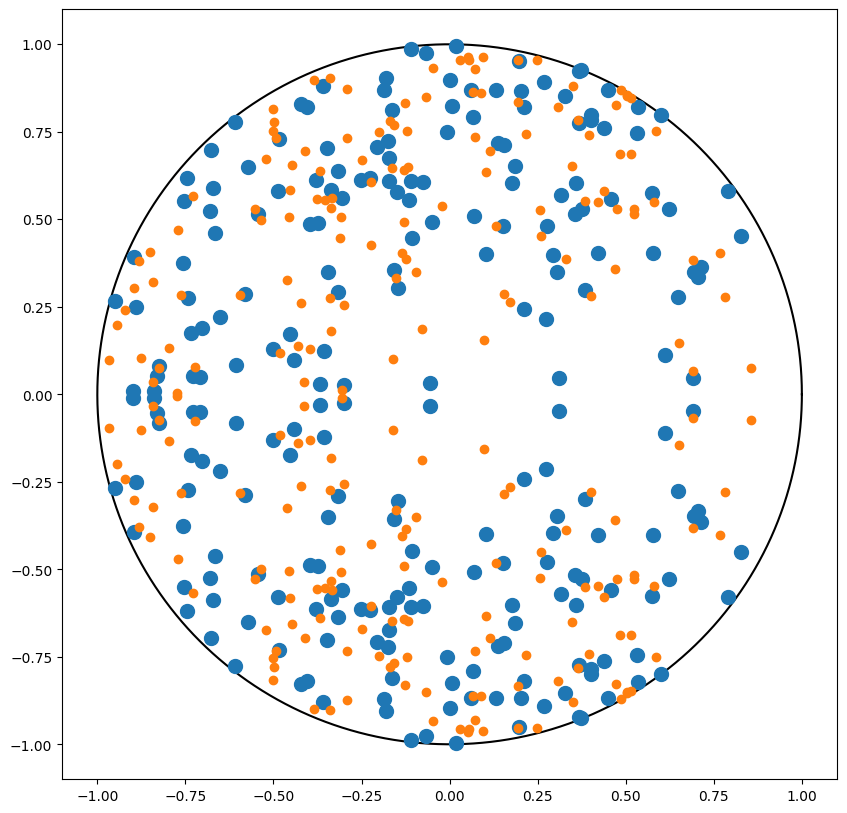

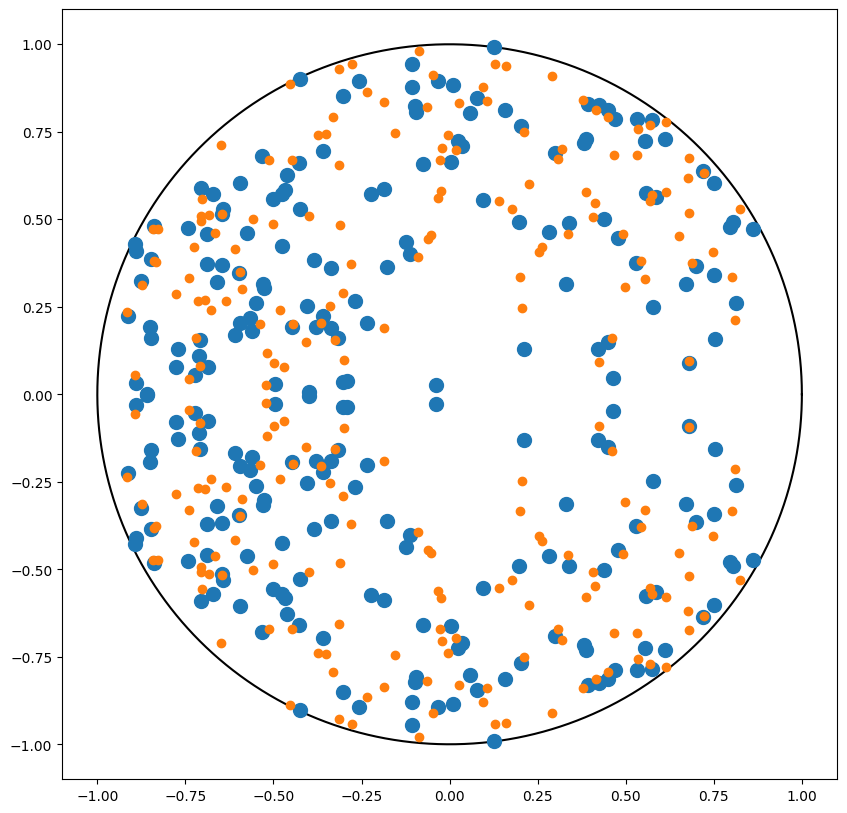

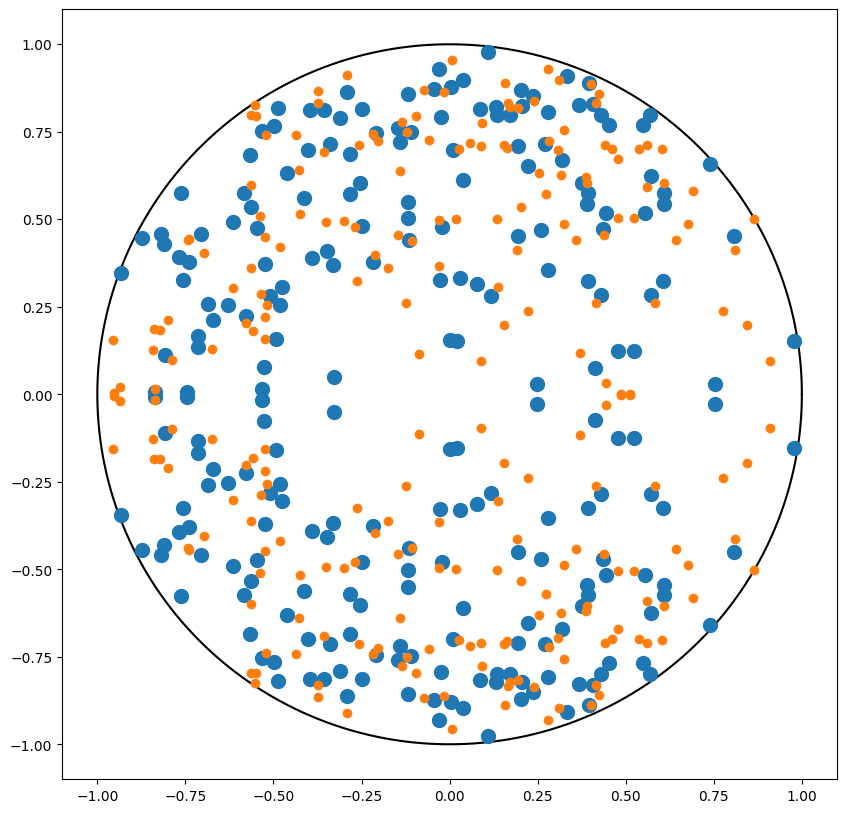

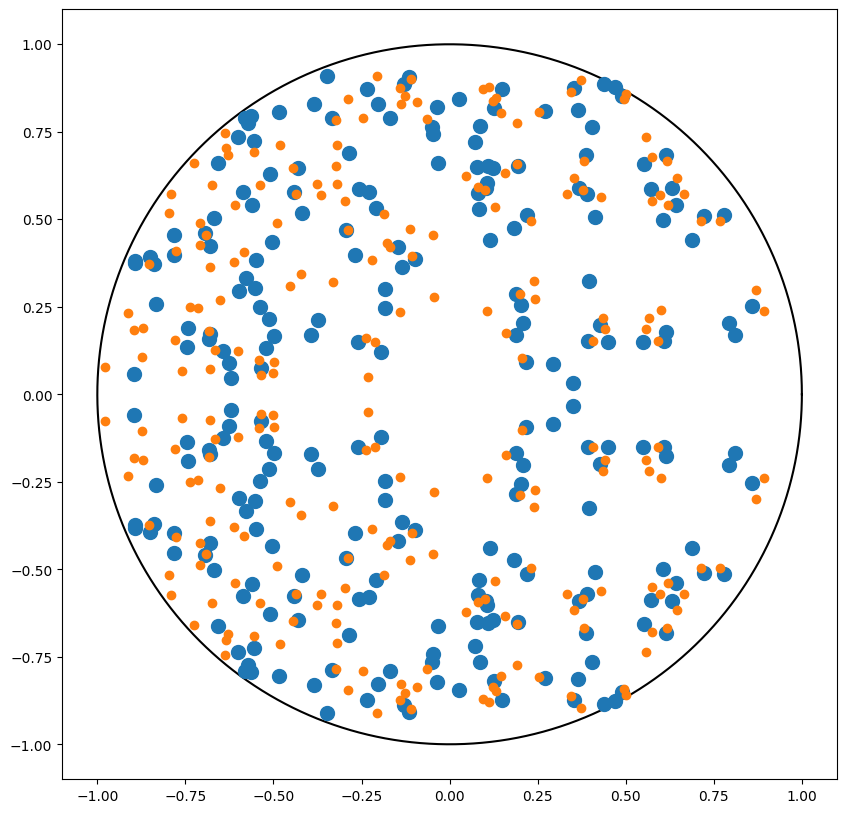

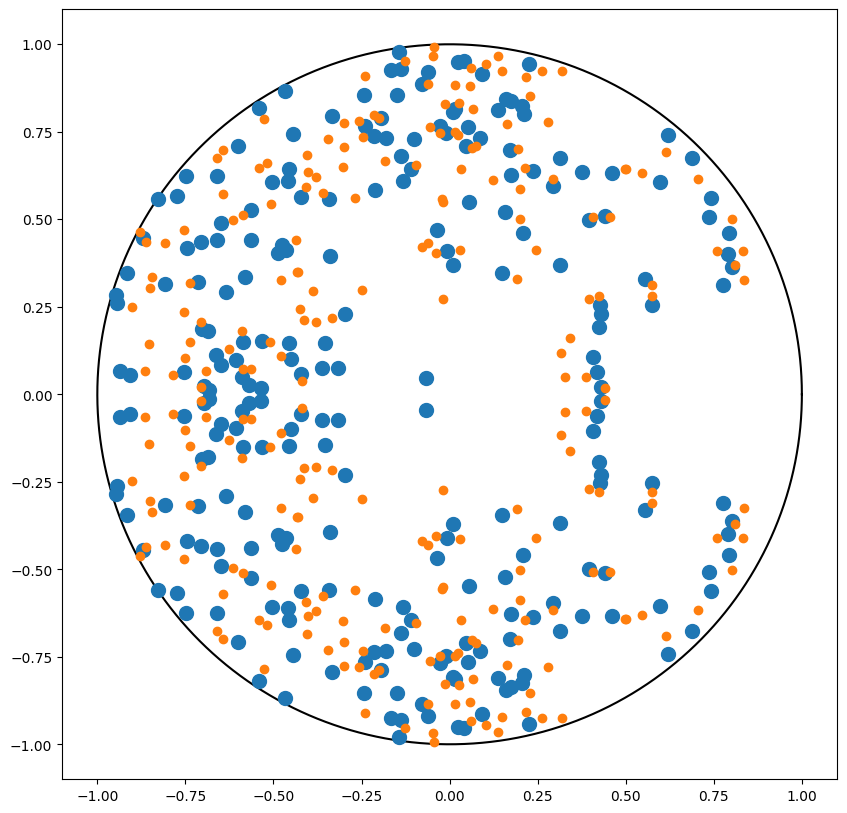

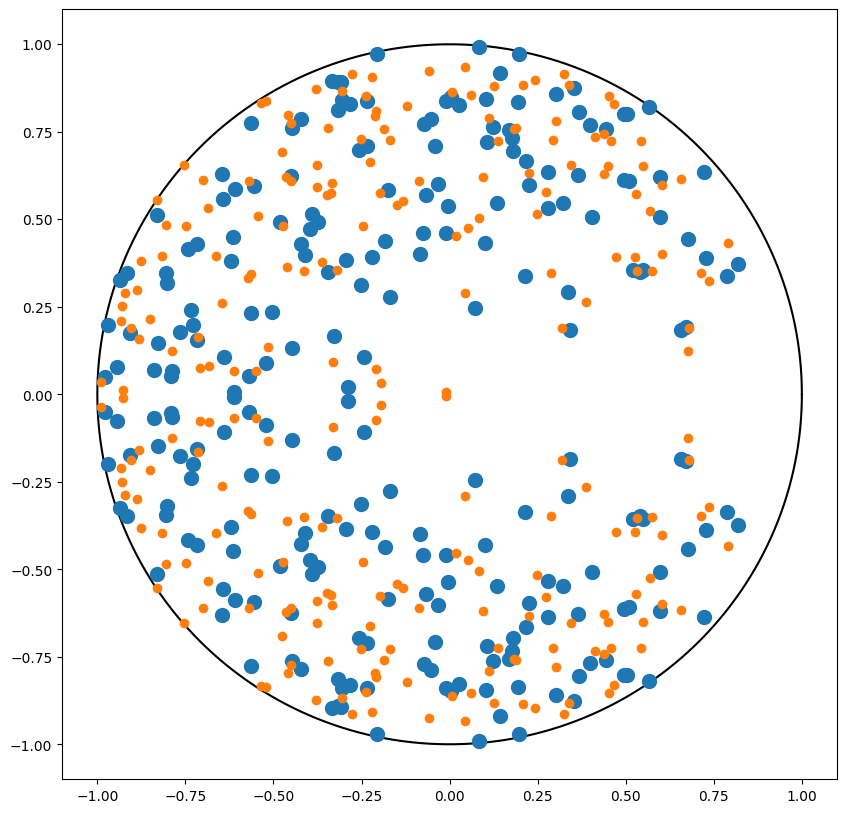

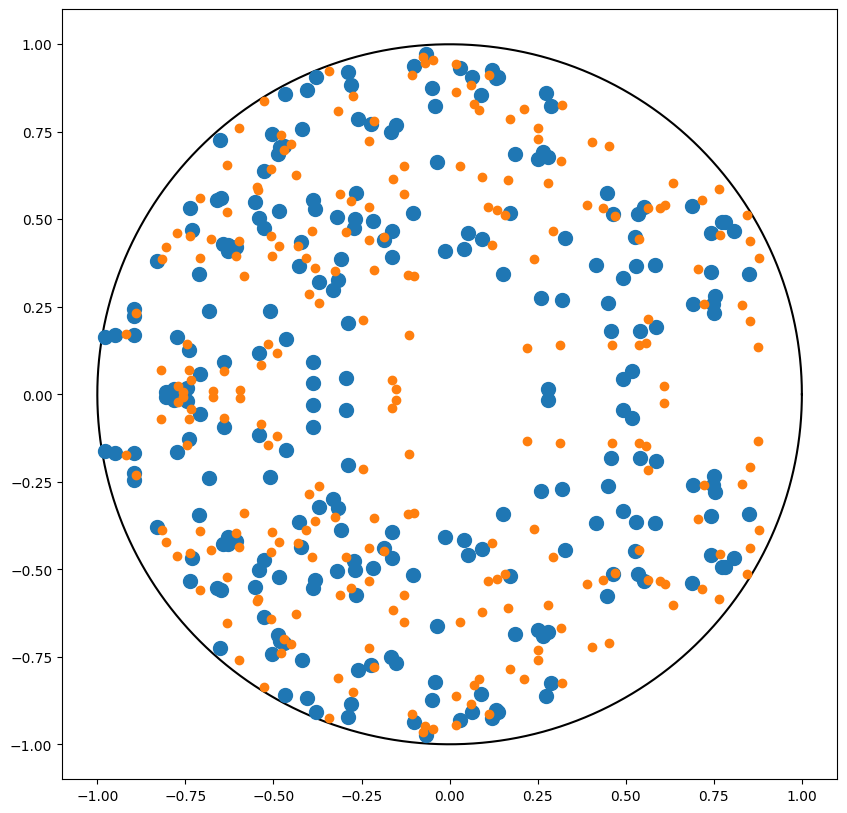

In [13]:
for csr_exp, csr in zip(csr_exp_list, csr_list):
    csr_exp.plot_circle()
    csr_exp.plot(markersize=10)
    csr.plot(markersize=6)
    plt.show()

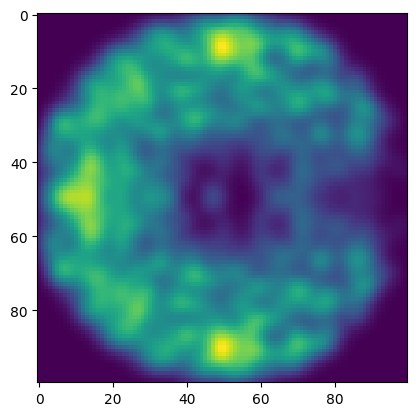

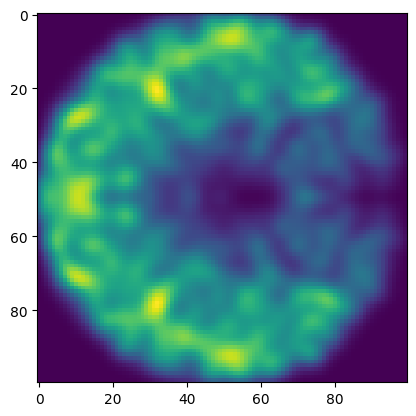

In [14]:
csr_exp_coat = coat_spectrum(Spectrum(csr_exp_list), sigma=0.05)
csr_coat = coat_spectrum(Spectrum(csr_list), sigma=0.05)

plt.imshow(csr_exp_coat)
plt.show()

plt.imshow(csr_coat)
plt.show()